# Text Classification using Naive Bayes

FEYZA OZKEFE 20comp5008


### Import Libraries

In [106]:
# Importing Necessary Packages

import pandas as pd
import numpy as np
# import sklearn
# import chardet
import os
import re
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from warnings import filterwarnings
filterwarnings("ignore")

In [107]:
# Reading all 22 sgm files of the data

files = [r"reuters21578/reut2-%03d.sgm" % r for r in range(0, 22)]

### Preprocessing the SGML data

In [108]:
# Regex codes to extract actual body from all the sgm files

t=re.compile(r'<TEXT[\S\s]*?>[\S\s]*?</TEXT>') 
t1=re.compile(r'<TEXT>')
t2=re.compile(r'<TEXT TYPE="UNPROC">')
t3=re.compile(r'<TEXT TYPE="BRIEF">')
p=re.compile(r'&#2;([\S\s]*?)&#3')
q=re.compile(r'<BODY>([\S\s]*?)</BODY>')
r=re.compile(r'<TITLE>([\S\s]*?)</TITLE>')
s=re.compile(r'<TOPICS>([\s\S]*?)</TOPICS>')

In [109]:
body=[]  #Storing body parts as defined in the ReadME document of the data
for j in range(len(files)):
    f=open(files[j])
    data=f.read()
    n=t.findall(data)
    for i in n:
        if t1.findall(i)!=[]:
            body=body+(q.findall(i))
        elif t2.findall(i)!=[]:
            body=body+(p.findall(i))
        elif t3.findall(i)!=[]:
            body=body+(r.findall(i))
        
len(body)

21578

In [110]:
# Creating Dataframe df consisting columns obtained from lists topics,body,LEWIS

topic=[]  #storing all the topic names(None for no topic names)
import re
u=re.compile(r"<TOPICS(>[<D>(\S)</D>]*<)/TOPICS>")
v=re.compile(r"<D>([\w-]*)</D>")
for j in range(len(files)):
    f=open(files[j])
    data=f.read()
    m = u.findall(data)
    for x in m:
        if x=='><':
            topic.append(["None"])
        else:
            topic.append(v.findall(x))
len(topic)

21578

In [111]:
# Extracting LEWIS Train/test split from the sgm files

LEWIS=[]
z=re.compile(r'LEWISSPLIT=(\S+)')
for  j in range(len(files)):
    f=open(files[j])
    data=f.read()
    LEWIS+=z.findall(data)
len(LEWIS)

21578

In [112]:
# Creating Dataframe df consisting columns obtained from lists topics,body,LEWIS

import pandas as pd
df=pd.DataFrame(list(zip(topic,body,LEWIS)),
              columns=['topics','body','LEWIS'])

df.head()

,topics,body,LEWIS
0,[cocoa],Showers continued throughout the week in\nthe ...,"""TRAIN"""
1,[None],Standard Oil Co and BP North America\nInc said...,"""TRAIN"""
2,[None],Texas Commerce Bancshares Inc's Texas\nCommerc...,"""TRAIN"""
3,[None],BankAmerica Corp is not under\npressure to act...,"""TRAIN"""
4,"[grain, wheat, corn, barley, oat, sorghum]",The U.S. Agriculture Department\nreported the ...,"""TRAIN"""


In [113]:
# Dropping the rows which have null values in the Topics column of df

for i in range(len(df['topics'])):
    if df['topics'][i]==['None']:
        df['topics'][i]=None
df = df.dropna(how='any',axis=0) 
df.reset_index(drop=True, inplace=True)

In [114]:
# Creating a new dataframe named same as the previous dataframe(df)

# Here different topics in a list of 'topics' column in the old dataframe are separated in different
# rows in the new dataframe and body is repeated for each of them in the same list

new_top=[]
new_body=[]
new_LEWIS=[]
for i in range(len(topic)):
    for j in topic[i]:
        new_top.append(j)
        new_body.append(body[i])
        new_LEWIS.append(LEWIS[i])

In [115]:
df=pd.DataFrame(list(zip(new_top,new_body,new_LEWIS)),
              columns=['Topics','Body','LEWIS'])

print("dataset shape:",df.shape)
df.head()

dataset shape: (24513, 3)


,Topics,Body,LEWIS
0,cocoa,Showers continued throughout the week in\nthe ...,"""TRAIN"""
1,None,Standard Oil Co and BP North America\nInc said...,"""TRAIN"""
2,None,Texas Commerce Bancshares Inc's Texas\nCommerc...,"""TRAIN"""
3,None,BankAmerica Corp is not under\npressure to act...,"""TRAIN"""
4,grain,The U.S. Agriculture Department\nreported the ...,"""TRAIN"""


In [116]:
# Dropping the rows which have null values in the Topics column of df

for i in range(len(df['Topics'])):
    if df['Topics'][i]=='None':
        df['Topics'][i]=None
df= df.dropna(how='any',axis=0) 
df.reset_index(drop=True, inplace=True)
print("dataset shape:",df.shape)

dataset shape: (14302, 3)


In [117]:
# BURAYA KADAR SADECE CGI COLUMN'U CIKARDIM 

In [118]:
# Select the five topics and save it as a new dataframe

df2 = df[df['Topics'].isin(['grain','money-fx','earn','acq','crude'])]
print("dataset shape:",df2.shape)
df2.head()

dataset shape: (8498, 3)


,Topics,Body,LEWIS
1,grain,The U.S. Agriculture Department\nreported the ...,"""TRAIN"""
16,grain,Argentine grain board figures show\ncrop regis...,"""TRAIN"""
19,earn,Champion Products Inc said its\nboard of direc...,"""TRAIN"""
20,acq,Computer Terminal Systems Inc said\nit has com...,"""TRAIN"""
21,earn,"Shr 34 cts vs 1.19 dlrs\n Net 807,000 vs 2,...","""TRAIN"""


In [120]:
# Drop the duplicates (we don't want a body that includes 2 topic in these 5)

df_new = df2.drop_duplicates(subset = "Body") 
print("dataset shape:",df_new.shape)
print("LEWIS includes:",df_new['LEWIS'].unique())
df_new.head()

dataset shape: (8355, 3)
LEWIS includes: ['"TRAIN"' '"NOT-USED"' '"TEST"']


,Topics,Body,LEWIS
1,grain,The U.S. Agriculture Department\nreported the ...,"""TRAIN"""
16,grain,Argentine grain board figures show\ncrop regis...,"""TRAIN"""
19,earn,Champion Products Inc said its\nboard of direc...,"""TRAIN"""
20,acq,Computer Terminal Systems Inc said\nit has com...,"""TRAIN"""
21,earn,"Shr 34 cts vs 1.19 dlrs\n Net 807,000 vs 2,...","""TRAIN"""


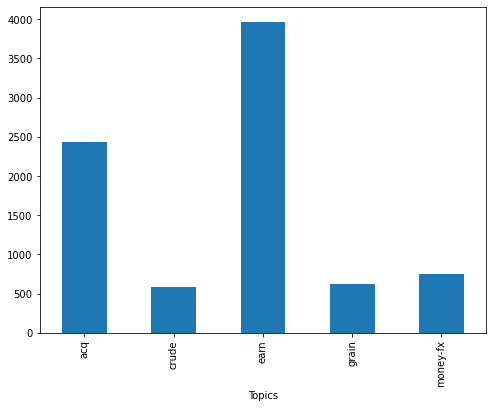

In [143]:
# Quick look at the topic numbers

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_new.groupby('Topics').Topics.count().plot.bar(ylim=0)
plt.show()

### Importing more libraries 

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Label Encoding of Topics

In [145]:
from sklearn.preprocessing import LabelEncoder

#creating labelEncoder
encoder = LabelEncoder()
# Converting string labels into numbers.
df_new["Topic_code"] = encoder.fit_transform(df_new["Topics"])

### Classification using Multinomial Naive Bayes Model

With using the library 

### Text Representation

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_new.Body).toarray()
labels = df_new.Topic_code
features.shape

(8355, 20040)

### Train-test split for Body and Topic-code of the dataframe

In [148]:
# Split the Dataset as train and test set

df_train =df_new[df_new["LEWIS"] == '"TRAIN"']
print("train dataset shape:",df_train.shape)

df_test = df_new[df_new["LEWIS"] == '"TEST"']
print("test dataset shape:",df_test.shape)

train dataset shape: (5783, 4)
test dataset shape: (2302, 4)


In [149]:
df_train.head()

,Topics,Body,LEWIS,Topic_code
1,grain,The U.S. Agriculture Department\nreported the ...,"""TRAIN""",3
16,grain,Argentine grain board figures show\ncrop regis...,"""TRAIN""",3
19,earn,Champion Products Inc said its\nboard of direc...,"""TRAIN""",2
20,acq,Computer Terminal Systems Inc said\nit has com...,"""TRAIN""",0
21,earn,"Shr 34 cts vs 1.19 dlrs\n Net 807,000 vs 2,...","""TRAIN""",2


In [150]:
df_test.head()

,Topics,Body,LEWIS,Topic_code
9822,grain,A survey of 19 provinces and seven cities\nsho...,"""TEST""",3
9823,crude,The Ministry of International Trade and\nIndus...,"""TEST""",1
9826,grain,Thailand's trade deficit widened to 4.5\nbilli...,"""TEST""",3
9840,grain,Food Department officials said the U.S.\nDepar...,"""TEST""",3
9843,acq,Sumitomo Bank Ltd &lt;SUMI.T> is certain to\nl...,"""TEST""",0


In [151]:
X_train = df_train['Body']
y_train = df_train['Topic_code']

X_test = df_test['Body']
y_test = df_test['Topic_code']

print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_test is {}".format(X_test.shape, y_test.shape))

Shape of X_train is (5783,) and shape of y_train is (5783,)
Shape of X_test is (2302,) and shape of y_test is (2302,)


In [203]:
# Fitting the model with MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
nb_model = MultinomialNB().fit(X_train_tfidf, y_train)

In [217]:
df_new['topic-tuple'] = df_new[['Topic_code', 'Topics']].apply(tuple, axis=1)
topic = df_new['topic-tuple'].unique()

In [218]:
prediction = nb_model.predict(count_vect.transform(["Responsibility for the appreciation of the Taiwan dollar \
and the South Korean Won lies soley with those countries, said U.S. trade representative Clayton \
Yeutter Speaking to the Asia Society, Yeutter said that it is in those countries' own long-term interest\
to raise the value of their currencies against the dollar."]))

print("this text belongs to category:",topic[prediction])

this text belongs to category: [(4, 'money-fx')]


In [205]:
from sklearn import metrics

model= MultinomialNB()
pipeline_Mnv = Pipeline([('vectorizer', TfidfVectorizer(sublinear_tf=True, min_df=5, 
                                                        norm='l2', encoding='latin-1', 
                                                        ngram_range=(1, 2), stop_words='english')),
                         ('classifier', model)])

pipeline_Mnv.fit(X_train, y_train)
y_pred = pipeline_Mnv.predict(X_test)
accuracy_Mnv = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy_Mnv)
print(metrics.classification_report(y_test, y_pred, target_names=df_new['Topics'].unique()))

accuracy: 0.9609035621198957
              precision    recall  f1-score   support

       grain       0.92      0.98      0.95       717
        earn       1.00      0.83      0.90       183
         acq       0.98      0.98      0.98      1081
       crude       0.99      0.91      0.95       147
    money-fx       0.98      0.97      0.97       174

    accuracy                           0.96      2302
   macro avg       0.97      0.93      0.95      2302
weighted avg       0.96      0.96      0.96      2302

